# Introduction
Visualizing the paths of 

- GD on Client data
- GD on accumulated distribution ( with gradient descent )
- FedAvg ( with gradient descent )


## Table of Contents:
* [**Part 1**: Create non-iid client distributions](#ref1)
* [**Part 2**. Apply gradient descent for one client](#ref2)
* [2.1 Right on track: gradient descent ftw!](#ref2.1)
* [2.2 Taking the detour: an intro to gradient descent in python](#ref2.2)
* [**Part 3**:Gradient descent for both clients and the global distribution](#ref3)
* [**Part 4**: FedAvg with non-iid clients](#ref4)
* [4.1 Taking the detour: An intro to FedAvg](#ref4.1)
* [4.2 Back on track: Federated Averaging](#ref4.2)
* [4.3 How to mess with Federated Averaging](#ref4.3)
* [**Part 5**: Optional: further plots and experiments ](#ref5)

In [15]:
# import some utilities
from computation_fedavg_gd import grad_descent, partial_derivative
from computation_fedavg_gd import MultivarianteGaussian

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## **Part 1**: Create non-iid client distributions <a class="anchor" id="ref1"></a>
### Multivariante Gaussians: Draw the client distributions over our model weights / over theta 
First step: lets pick two client distributions. The Multivariante Gaussian is defined in ```computation_fedavg_gd.py```


In [16]:
multivariante1 = MultivarianteGaussian(
    mu=np.array([0, 1]), sigma=np.array([[1.0, -0.9], [-0.5, 1.5]])
)
multivariante2 = MultivarianteGaussian(
    np.array([0, -1.2]), sigma=np.array([[1.5, 0.6], [0.9, 1.0]])
)


In [17]:
# calculate at our target function over a sampling grid
from plot_fedavg_gd import SAMPLE_GRID_VECTOR, Z
Z1 = multivariante1.evaluate(theta_vec=SAMPLE_GRID_VECTOR)
Z2 = multivariante2.evaluate(theta_vec=SAMPLE_GRID_VECTOR)
print(f"evaluated gaussian over a 2D sampling grid {SAMPLE_GRID_VECTOR.shape} for a 3D target vector {Z1.shape}")

evaluated gaussian over a 2D sampling grid (71, 71, 2) for a 3D target vector (71, 71)


alright, lets make some fancy visualizations of our client 1 distribution

<IPython.core.display.Javascript object>


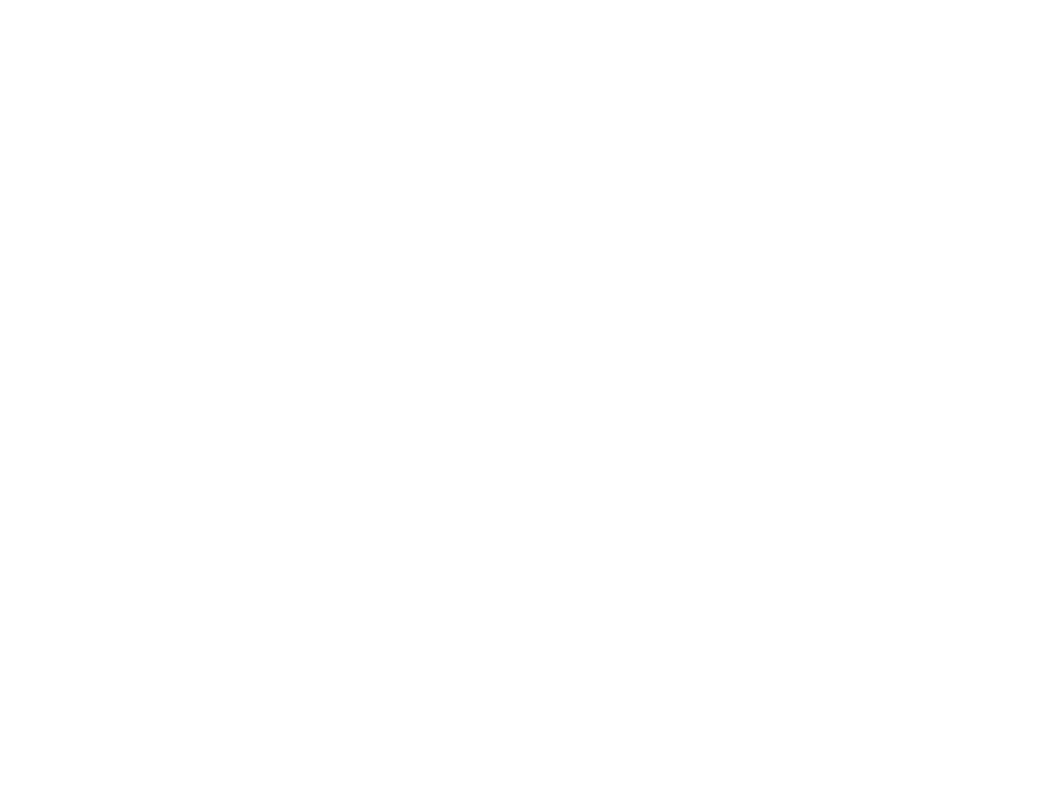

In [18]:
%matplotlib notebook 

# lets visualize our distributions

def client_function_draw(eval_sample):
    # some 3D settings
    fig = plt.figure()
    ax = fig.gca(projection="3d")
    ax.set_xlabel(r"${\theta}_0$", zorder = 1)
    ax.set_ylabel(r"${\theta}_1$", zorder = 1)
    ax.set_zlabel(r"J(${\theta}_0$, ${\theta}_1$)", zorder = 1)

    # plot a 3D curve
    ax.plot_wireframe(
        SAMPLE_GRID_VECTOR[:,:,0],
        SAMPLE_GRID_VECTOR[:,:,1],
        eval_sample,
        rstride=3,
        cstride=3,
        linewidth=0.5,
        antialiased=True,
        cmap=matplotlib.cm.Greens,
        label="client 1 target",
        zorder=1,
    )
    # make a 2D Countour plot in green on the bottom
    ax.contourf(
        SAMPLE_GRID_VECTOR[:,:,0],
        SAMPLE_GRID_VECTOR[:,:,1],
        eval_sample,
        zdir="z",
        offset=-0.05,
        cmap=matplotlib.cm.Greens,
        zorder=0,
    )
    return ax
fig = client_function_draw(Z1)

## **Part 2**. Apply gradient descent for one client <a class="anchor" id="ref2"></a>


### 2.1 Right on track: gradient descent ftw! <a class="anchor" id="ref2.1"></a>
Let's see how this would look like, with Gradient Descent applied. If you want to see how GD works, look [below](#ref2.2).

iter: 20, theta0: -1.90, theta1: 0.135, gradient: 5.851644834070548e-05
iter: 40, theta0: -1.78, theta1: 0.183, gradient: 0.00012030952797817407
iter: 60, theta0: -1.61, theta1: 0.256, gradient: 0.00029321539987694524
iter: 80, theta0: -1.37, theta1: 0.375, gradient: 0.0008646377314871119
iter: 100, theta0: -1.01, theta1: 0.578, gradient: 0.002478085102418169
iter: 120, theta0: -0.60, theta1: 0.842, gradient: 0.0027783703576439445
iter: 140, theta0: -0.31, theta1: 1.016, gradient: 0.0008270639842299921
iter: 160, theta0: -0.17, theta1: 1.076, gradient: 0.00016233945655244608
iter: 180, theta0: -0.11, theta1: 1.084, gradient: 3.89347381805627e-05
iter: 200, theta0: -0.07, theta1: 1.075, gradient: 1.43771937393955e-05
iter: 220, theta0: -0.05, theta1: 1.061, gradient: 7.246760000662045e-06
iter: 240, theta0: -0.04, theta1: 1.049, gradient: 4.119632822013886e-06
iter: 260, theta0: -0.03, theta1: 1.038, gradient: 2.424153120739181e-06
iter: 280, theta0: -0.02, theta1: 1.029, gradient: 1.43

<IPython.core.display.Javascript object>


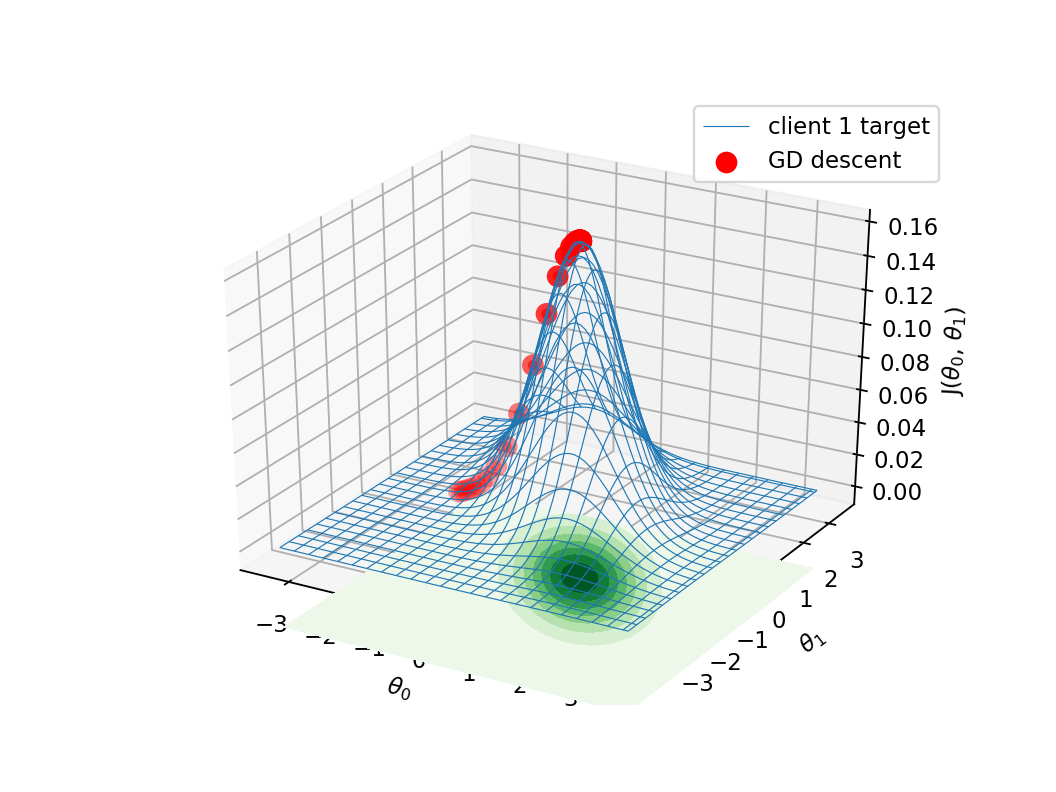

In [19]:
%matplotlib notebook 

THETA0 =-2.0
THETA1 =0.1
history = grad_descent(
    function_descent=multivariante1.evaluate,
    theta0=THETA0,
    theta1=THETA1,
    eps=1e-07,  # stop condition
    nb_max_iter=1000,  # max iterations,
    verbose=1,
)
ax = client_function_draw(Z1)

ax.scatter(
    history[:, 0][::10],
    history[:, 1][::10],
    history[:, 2][::10],
    label="GD descent",
    c="red",
    lw=5,
    zorder=100,
)
fig = ax.legend()

Awesome. If you are interested how gradient descent works, check out the file ```computation_fedavg_gd.py``` in this repository. You can also check out this code at the below, for your convinience.

## 2.2  Taking the detour: an intro to gradient descent in python<a class="anchor" id="ref2.2"></a>


Optional: an intro to gradient descent in python<a class="anchor" id="ref2"></a>

In [20]:
# OPTIONAL: view the source code
import inspect

print("# Usage of line-search: optimize one parameter at a time: \n \n")
print(inspect.getsource(partial_derivative))

print("# Evaluating gradient descent for one function: \n \n")
print(inspect.getsource(grad_descent))


# Usage of line-search: optimize one parameter at a time: 
 

def partial_derivative(func, var=0, thetas=[]):
    """for line search in one-dim parameter space"""
    # credits https://moonbooks.org/Articles/How-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum-/
    args = thetas[:]

    def wraps(x):
        """pick one of the thetas to optimize"""
        args[var] = x
        return func(*args)

    return misc.derivative(wraps, thetas[var])

# Evaluating gradient descent for one function: 
 

def grad_descent(
    function_descent,
    theta0=START_THETA0,
    theta1=START_THETA1,
    eps=1e-07,  # stop condition
    lr_alpha=3e-01,  # learning rate
    nb_max_iter=1000,  # max iterations,
    verbose=0,
):
    """gradient descent
    
    :param function_descent: python function for evaluating the gradient 
    :param theta0/theta1: float, start values of theta
    :param eps: float, stop condition
    :param lr_alpha: float,learning rate
    :param nb_max_iter: i

## **Part 3**:Gradient descent for both clients and the global distribution <a class="anchor" id="ref3"></a>
### Lets add two functions client1 + client2 together!
draw global distribution (add both )

In [21]:
def f_added_tutorial(theta0: float = None, theta1: float = None, theta_vec: float = None):
    """adds the output of the two client distributions"""
    if theta_vec is not None and theta0 is None and theta1 is None:
        pos = theta_vec
    elif theta_vec is None and theta0 is not None and theta1 is not None:
        pos = np.array((theta0, theta1))
    else:
        raise BaseException("either set a theta0/theta0 or theta_vec")
    # expects vectorized input
    # return == multivariante1 + multivariante2
    return multivariante1.evaluate(theta_vec = pos) + multivariante2.evaluate(theta_vec = pos)


client 1
create 3D plot using SGD on [('GD client 1', 'green')]over distribution ['client 1 target']


<IPython.core.display.Javascript object>


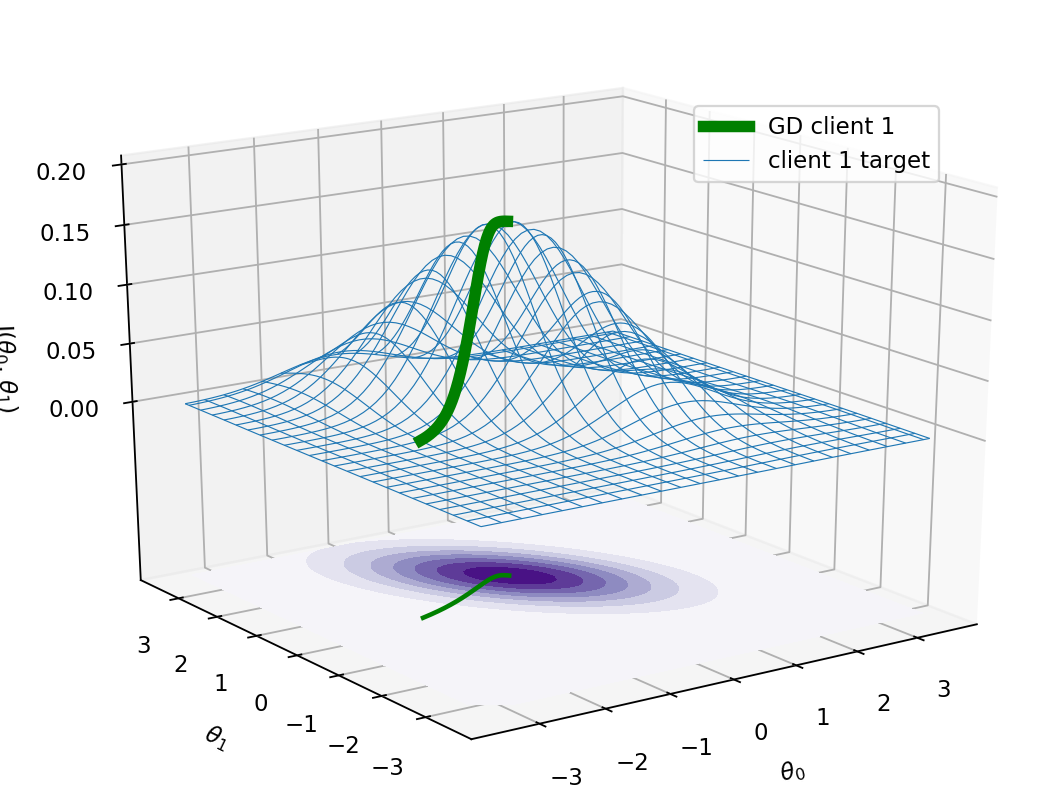

client 2
create 3D plot using SGD on [('GD client 2', 'orange')]over distribution ['client 2 target']


<IPython.core.display.Javascript object>


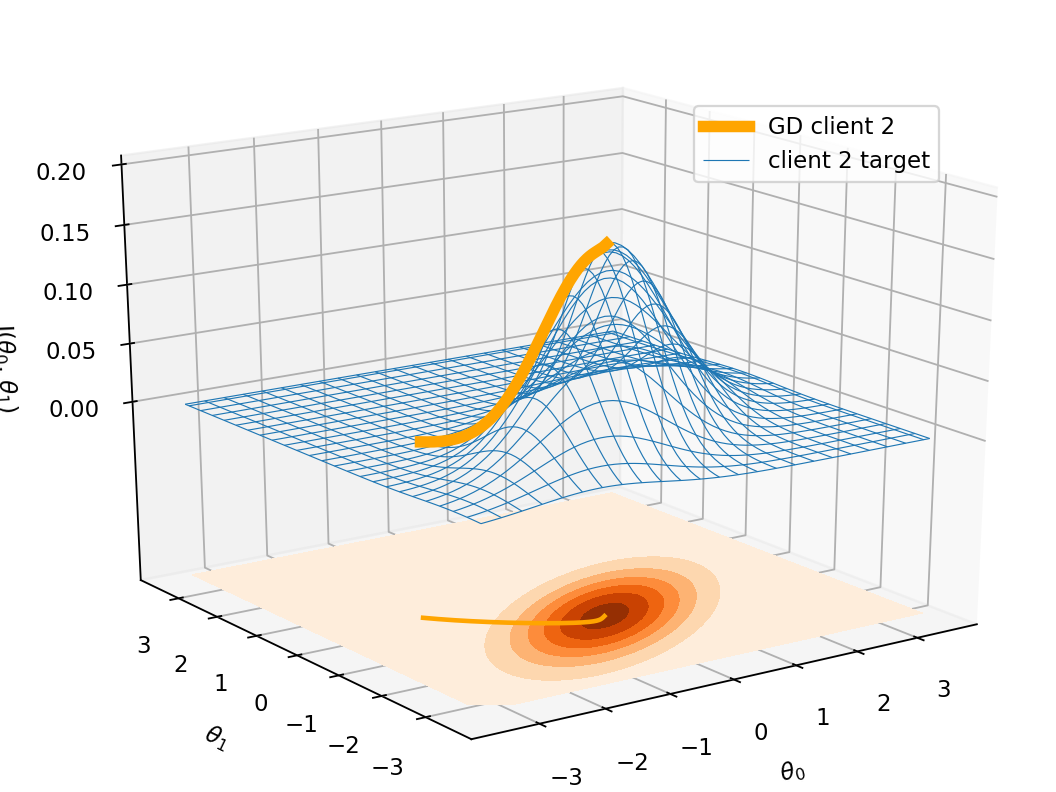

In [22]:
from plot_fedavg_gd import mpl_multivariante_3d_gd
print("client 1")
fig = mpl_multivariante_3d_gd(
    name_labels=[ "GD client 1"],
    colors=[ "green"],
    functions=[ multivariante1.evaluate],
    target_function=[ Z1],
    cmap_target=[ "Purples"],
    label_target=[ "client 1 target"],
    theta0=THETA0,
    theta1=THETA1,
)
print("client 2")
fig = mpl_multivariante_3d_gd(
    name_labels=["GD client 2", ],
    colors=["orange", ],
    functions=[multivariante2.evaluate, ],
    target_function=[Z2],
    cmap_target=["Oranges", ],
    label_target=["client 2 target", ],
    theta0=THETA0,
    theta1=THETA1,
)

create 3D plot using SGD on [('GD client 1&2', 'purple'), ('GD client 2', 'orange'), ('GD client 1', 'green')]over distribution ['global target']


<IPython.core.display.Javascript object>


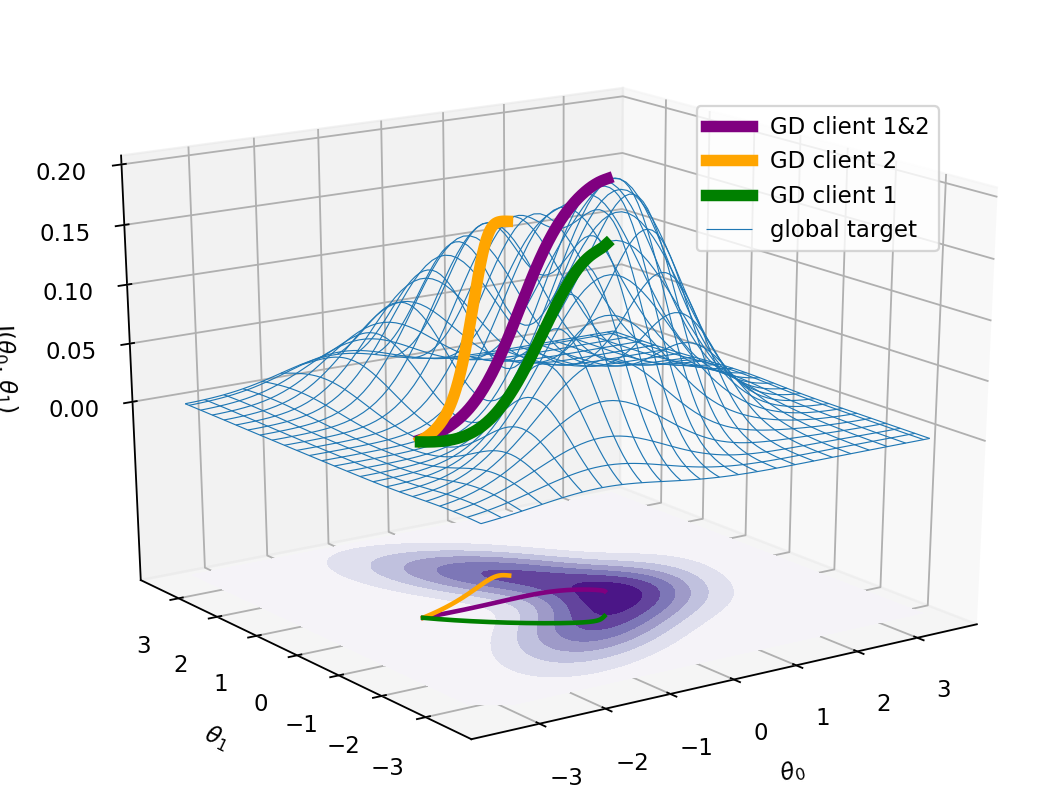

In [23]:
#lets do, as if we could aggregate our global function
fig = mpl_multivariante_3d_gd(
        name_labels=["GD client 1&2", "GD client 2", "GD client 1"],
        colors=["purple", "orange", "green"],
        functions=[f_added_tutorial, multivariante1.evaluate, multivariante2.evaluate],
        target_function=[Z],
        cmap_target=["Purples"],
        label_target=["global target"],
        theta0=THETA0,
        theta1=THETA1,
    )

# **Part 4**: FedAvg with non-iid clients<a class="anchor" id="ref4"></a>


## 4.1 Taking the detour: An intro to FedAvg <a class="anchor" id="ref4.1"></a>
FedAvg basically works like this:
```
theta = [theta0, theta1]
nb_rounds = 10
gd_steps_local = 20


def client_update(theta):
    """on the clients"""
    
    client_data = client.get_distribution() # get the client data
    
    # update the parameters
    for i in range(gd_steps_local):
        theta = grad_descent(client_data, theta, nb_steps=1)
    
    # send back the most recent model
    return theta
    
def fedavg_server_update(theta_0):
    """on the server"""
    theta_current = theta_0
    
    for i in range(nb_rounds):
        # in parallel
        theta_client1 = client1.client_update(theta_current)
        theta_client2 = client2.client_update(theta_current)  
        
        theta_current = average(theta_client1, theta_client2)
    
    # output best model at the end of training
    return theta_current 
```


In [24]:
# optional, get the source code 

import inspect
from computation_fedavg_gd import fedavg
print("# FedAvg implementation \n")
print(inspect.getsource(fedavg))

# FedAvg implementation 

def fedavg(
    function_descent_1,
    function_descent_2,
    function_eval,
    communication_rounds=100,
    gd_steps_local=10,
    theta0=START_THETA0,
    theta1=START_THETA1,
):
    x1_x2_z = np.array((theta0, theta1, function_eval(theta0=theta0, theta1=theta1)))
    history_server, history_client1, history_client2 = [], [], []
    history_server.append(x1_x2_z.tolist())

    for i in range(communication_rounds):
        # local epochs, client 1
        t1_t2_z_descent1 = grad_descent(
            function_descent_1,
            theta0=x1_x2_z[0],
            theta1=x1_x2_z[1],
            nb_max_iter=gd_steps_local,
        )
        # local epochs, client 2
        t1_t2_z_descent2 = grad_descent(
            function_descent_2,
            theta0=x1_x2_z[0],
            theta1=x1_x2_z[1],
            nb_max_iter=gd_steps_local,
        )
        # Average Update, server
        x1_x2_z = (t1_t2_z_descent1[-1, :] + t1_t2_z_descent2[-1, :]) / 2
       

## 4.2 Back on track: Federated Averaging <a class="anchor" id="ref4.2"></a>


<IPython.core.display.Javascript object>


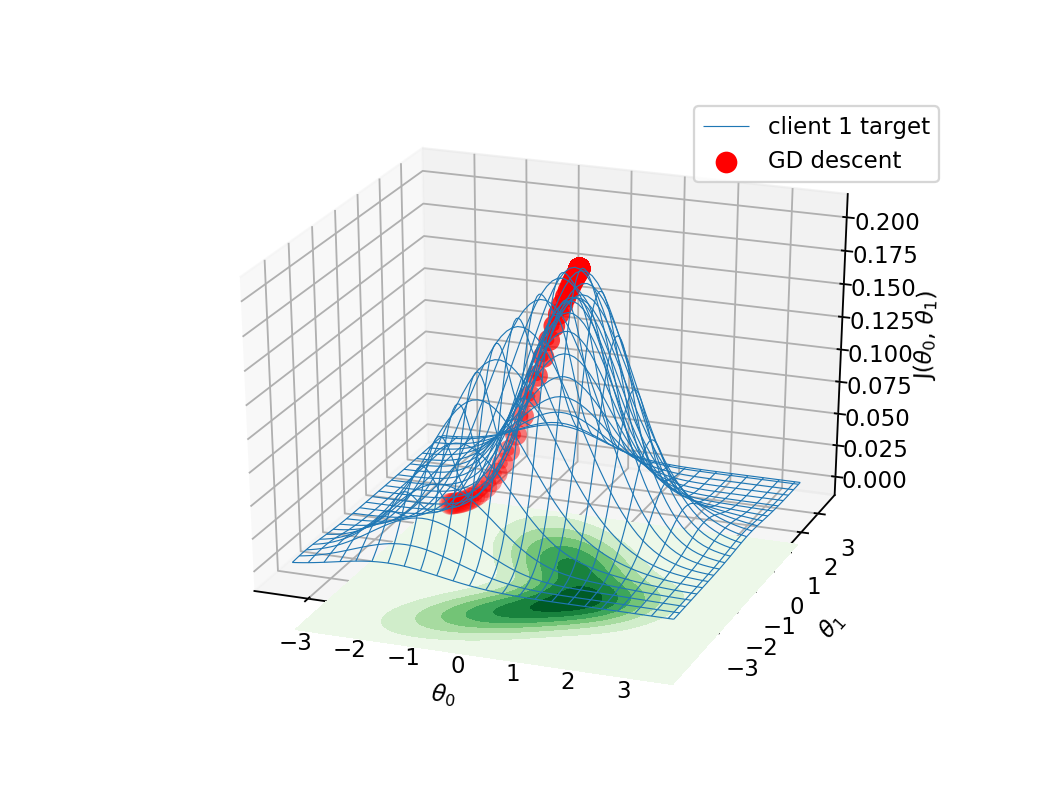

In [25]:
from computation_fedavg_gd import fedavg as fedavg_server_update

history , _, _ = fedavg_server_update(
    function_descent_1=multivariante1.evaluate, # client 1
    function_descent_2=multivariante2.evaluate, # client 2
    function_eval=f_added_tutorial,    # evaluation function on the server 
    communication_rounds = 500,
    gd_steps_local = 10,
    theta0=THETA0,
    theta1=THETA1,
)

ax = client_function_draw(Z)

ax.scatter(
    history[:, 0],
    history[:, 1],
    history[:, 2],
    label="GD descent",
    c="red",
    lw=5,
    zorder=100,
)
ax.legend()

### Congratiulations! You made it. FedAvg reaches the global optimum. But.. is that really true?
## 4.3 How to mess with Federated Averaging <a class="anchor" id="ref4.3"></a>



<IPython.core.display.Javascript object>


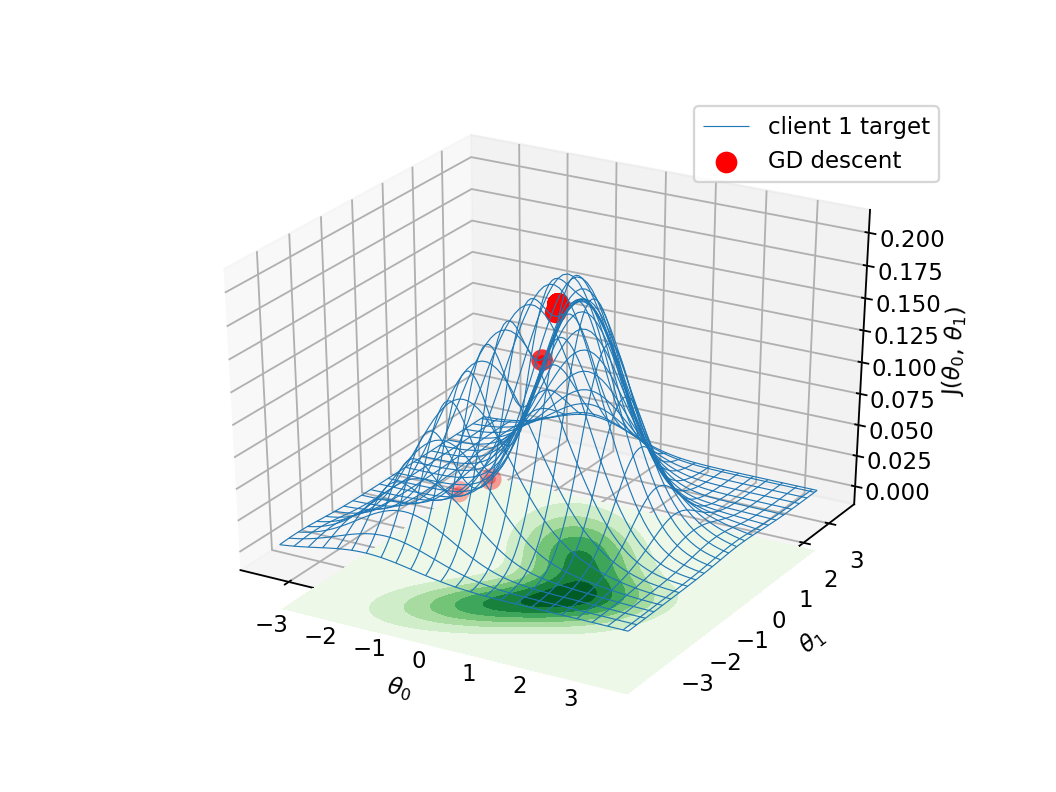

In [32]:
history , _, _ = fedavg_server_update(
    function_descent_1=multivariante1.evaluate, # client 1
    function_descent_2=multivariante2.evaluate, # client 2
    function_eval=f_added_tutorial,    # evaluation function on the server 
    communication_rounds = 20,
    gd_steps_local = 100,
    theta0=THETA0,
    theta1=THETA1,
)

ax = client_function_draw(Z)

ax.scatter(
    history[:, 0],
    history[:, 1],
    history[:, 2],
    label="GD descent",
    c="red",
    lw=5,
    zorder=100,
)
fig = ax.legend()


 If you would like to create more plots, find some below. 
 ## **Part 5**: Optional: further plots and experiments <a class="anchor" id="ref5"></a>

rounds 33, steps 95
create 3D plot using SGD on [('GD client 1&2', 'purple'), ('GD client 2', 'orange'), ('GD client 1', 'green')]over distribution ['accumulated targets (1&2)']


<IPython.core.display.Javascript object>


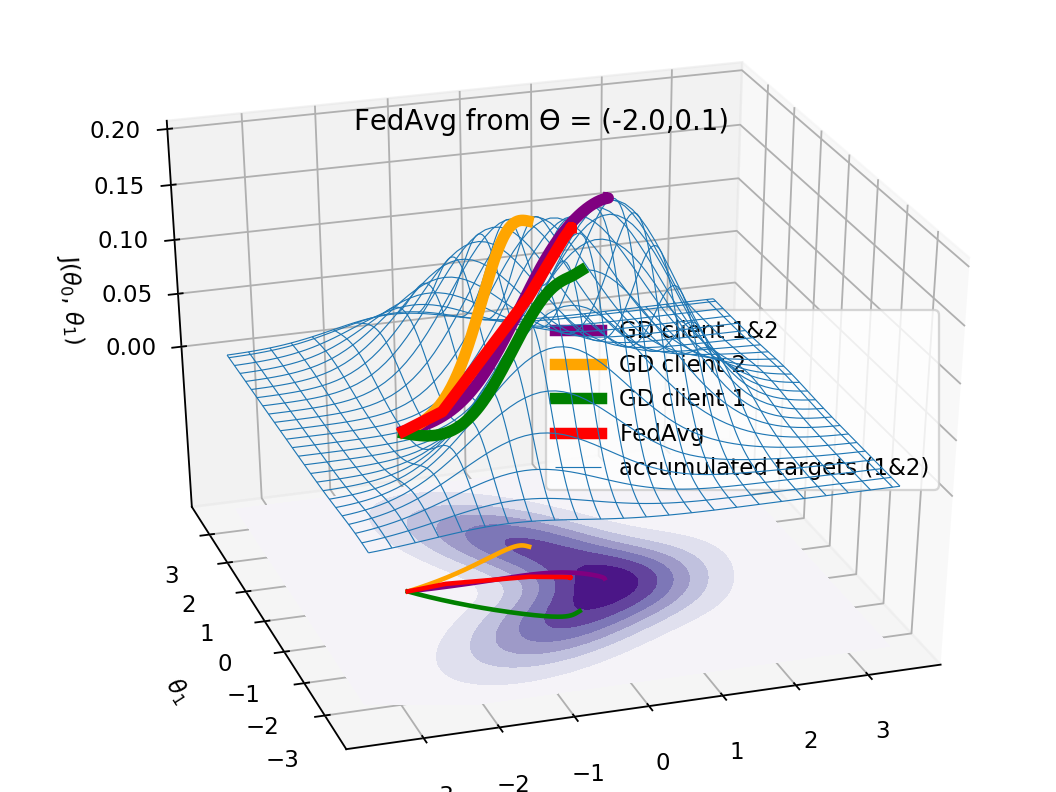

FedAvg from ϴ = (-2.0,0.1) [ 0.20869586 -0.13508129  0.17335261]


In [39]:
import random
rounds = random.randint(2,100)
steps = random.randint(1,20) * 5
print(f"rounds {rounds}, steps {steps}")

fig = mpl_multivariante_3d_gd(
    name_labels=["GD client 1&2", "GD client 2", "GD client 1"],
    colors=["purple", "orange", "green"],
    functions=[f_added_tutorial, multivariante1.evaluate, multivariante2.evaluate],
    target_function=[ Z],
    cmap_target=[ "Purples",],
    label_target=[ "accumulated targets (1&2)"],
    fedavg_1=multivariante1.evaluate,
    fedavg_2=multivariante2.evaluate,
    fedavg_eval=f_added_tutorial,
    fedavg_communication_rounds=rounds, 
    fedavg_steps_local=steps,
    title=f"FedAvg from \u03F4 = ({THETA0},{THETA1})",
    theta0=THETA0,
    theta1=THETA1,
)

# fig.savefig("name.svg") # for storing

In [13]:
# OPTIONAL: view the source code
import inspect

print("# Usage of line-search: optimize one parameter at a time: \n \n")
print(inspect.getsource(partial_derivative))

# Usage of line-search: optimize one parameter at a time: 
 

def partial_derivative(func, var=0, thetas=[]):
    """for line search in one-dim parameter space"""
    # credits https://moonbooks.org/Articles/How-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum-/
    args = thetas[:]

    def wraps(x):
        """pick one of the thetas to optimize"""
        args[var] = x
        return func(*args)

    return misc.derivative(wraps, thetas[var])

